# Primera Entrega — Análisis de Calidad de Vinos

**Autor:** Claudia Benitez


---

## Abstracto (Motivación y Audiencia)

El objetivo de este notebook es analizar datasets públicos de calidad de vino (tinto y blanco) para obtener insights accionables que ayuden a equipos de producción, enología y control de calidad a priorizar variables químicas que impactan en la calidad del producto. La audiencia principal son enólogos, gerentes de calidad y equipos de datos de la industria alimentaria.

---


## Preguntas / Hipótesis

**Preguntas**

1. ¿Qué diferencias existen entre vinos tintos y blancos en términos de variables químicas?
2. ¿Qué variables influyen más en la calidad del vino?
3. ¿La acidez, el alcohol o el contenido de azúcar tienen relación positiva o negativa con la calidad?
4. ¿Es posible predecir la calidad del vino utilizando modelos simples de Machine Learning?
5. ¿Qué características químicas diferencian a los vinos de baja y alta calidad?

**Hipótesis**

- H1: Los vinos de mayor calidad tienden a tener mayor graduación alcohólica.
- H2: La acidez volátil impacta negativamente en la calidad.
- H3: Los vinos blancos presentan mayor variabilidad en los niveles de azúcar residual.
- H4: Un modelo de clasificación simple puede diferenciar vinos buenos de vinos malos con >60% de accuracy.


## Importación de datos

Las rutas locales (ya cargadas en el entorno) son:

- `/mnt/data/winequality-white (2).csv`
- `/mnt/data/winequality-red (3).csv`

También se incluye el archivo teórico `DataScienceIIClases.docx` en `/mnt/data/DataScienceIIClases.docx`.

El siguiente bloque carga y concatena ambos datasets, y prepara una columna `type`.

In [4]:
import pandas as pd

# Cargar archivos 
red = pd.read_csv("https://raw.githubusercontent.com/ClauBenitez/datasciencestest/refs/heads/main/winequality-red.csv", sep=";")
white = pd.read_csv("https://raw.githubusercontent.com/ClauBenitez/datasciencestest/refs/heads/main/winequality-white.csv", sep=";")



white['type'] = 'white'
red['type'] = 'red'

df = pd.concat([white, red], axis=0).reset_index(drop=True)

print('White shape:', white.shape)
print('Red shape:', red.shape)
print('Combined shape:', df.shape)



White shape: (4898, 13)
Red shape: (1599, 13)
Combined shape: (6497, 13)


## Resumen de metadata

In [5]:
# Resumen rápido de metadata
print('Columnas:')
print(df.columns.tolist())

print('\nTipos de datos:')
print(df.dtypes)

print('\nValores nulos por columna:')
print(df.isnull().sum())

print('\nDescripción estadística (numérica):')
print(df.describe().T)

Columnas:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']

Tipos de datos:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type        

## Análisis Exploratorio de Datos (EDA)

Se incluyen los siguientes análisis:

- Distribución de la variable `quality` por `type` (histograma / countplot)
- Boxplots de variables seleccionadas vs `quality`
- Matriz de correlación y mapa de calor
- Comparaciones tinto vs blanco para variables clave
- Scatter plots y análisis de outliers


In [8]:
!pip install matplotlib seaborn --quiet



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
%matplotlib inline
sns.set_context('notebook')

### Distribución de calidad por tipo

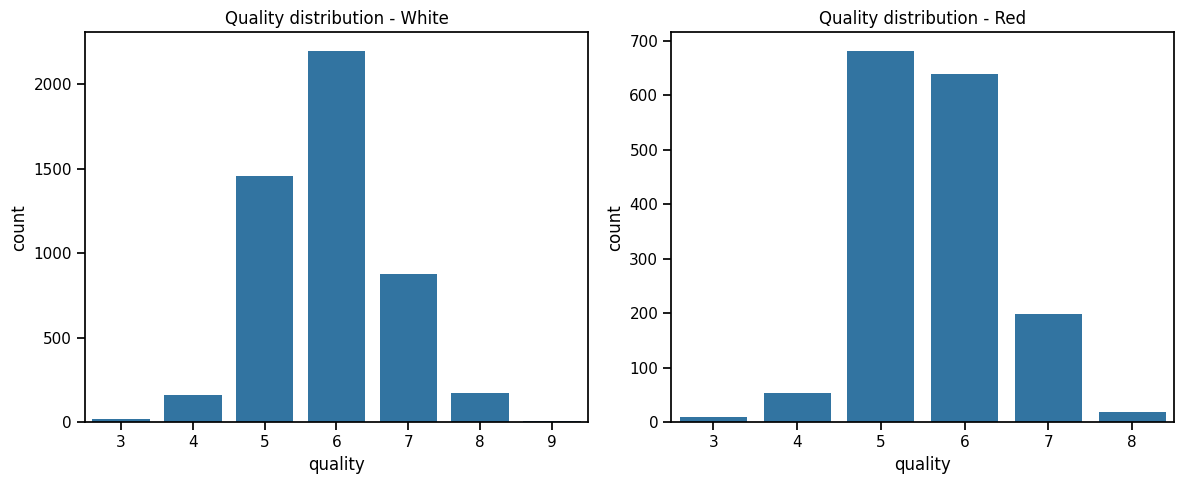

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='quality', data=white)
plt.title('Quality distribution - White')

plt.subplot(1,2,2)
sns.countplot(x='quality', data=red)
plt.title('Quality distribution - Red')

plt.tight_layout()


### Matriz de correlación (heatmap)

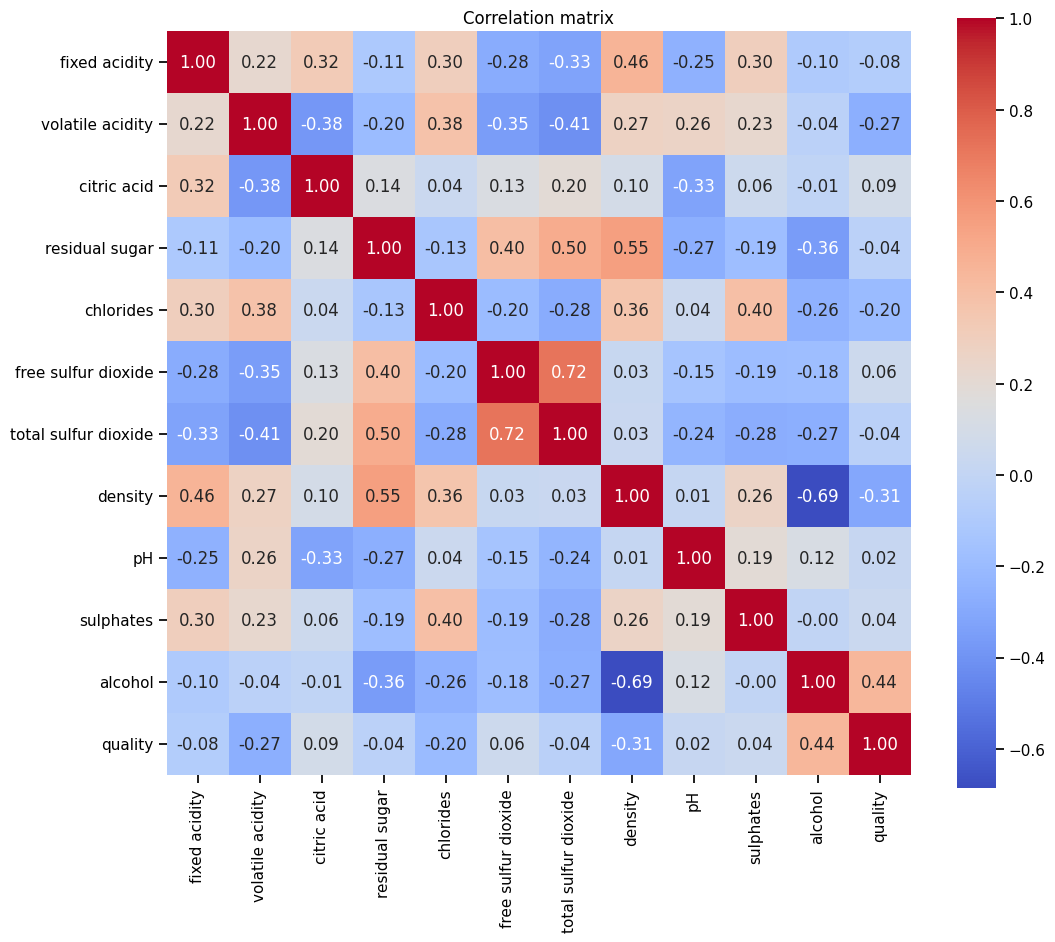

In [11]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation matrix')
plt.show()

### Boxplots: variables seleccionadas vs quality

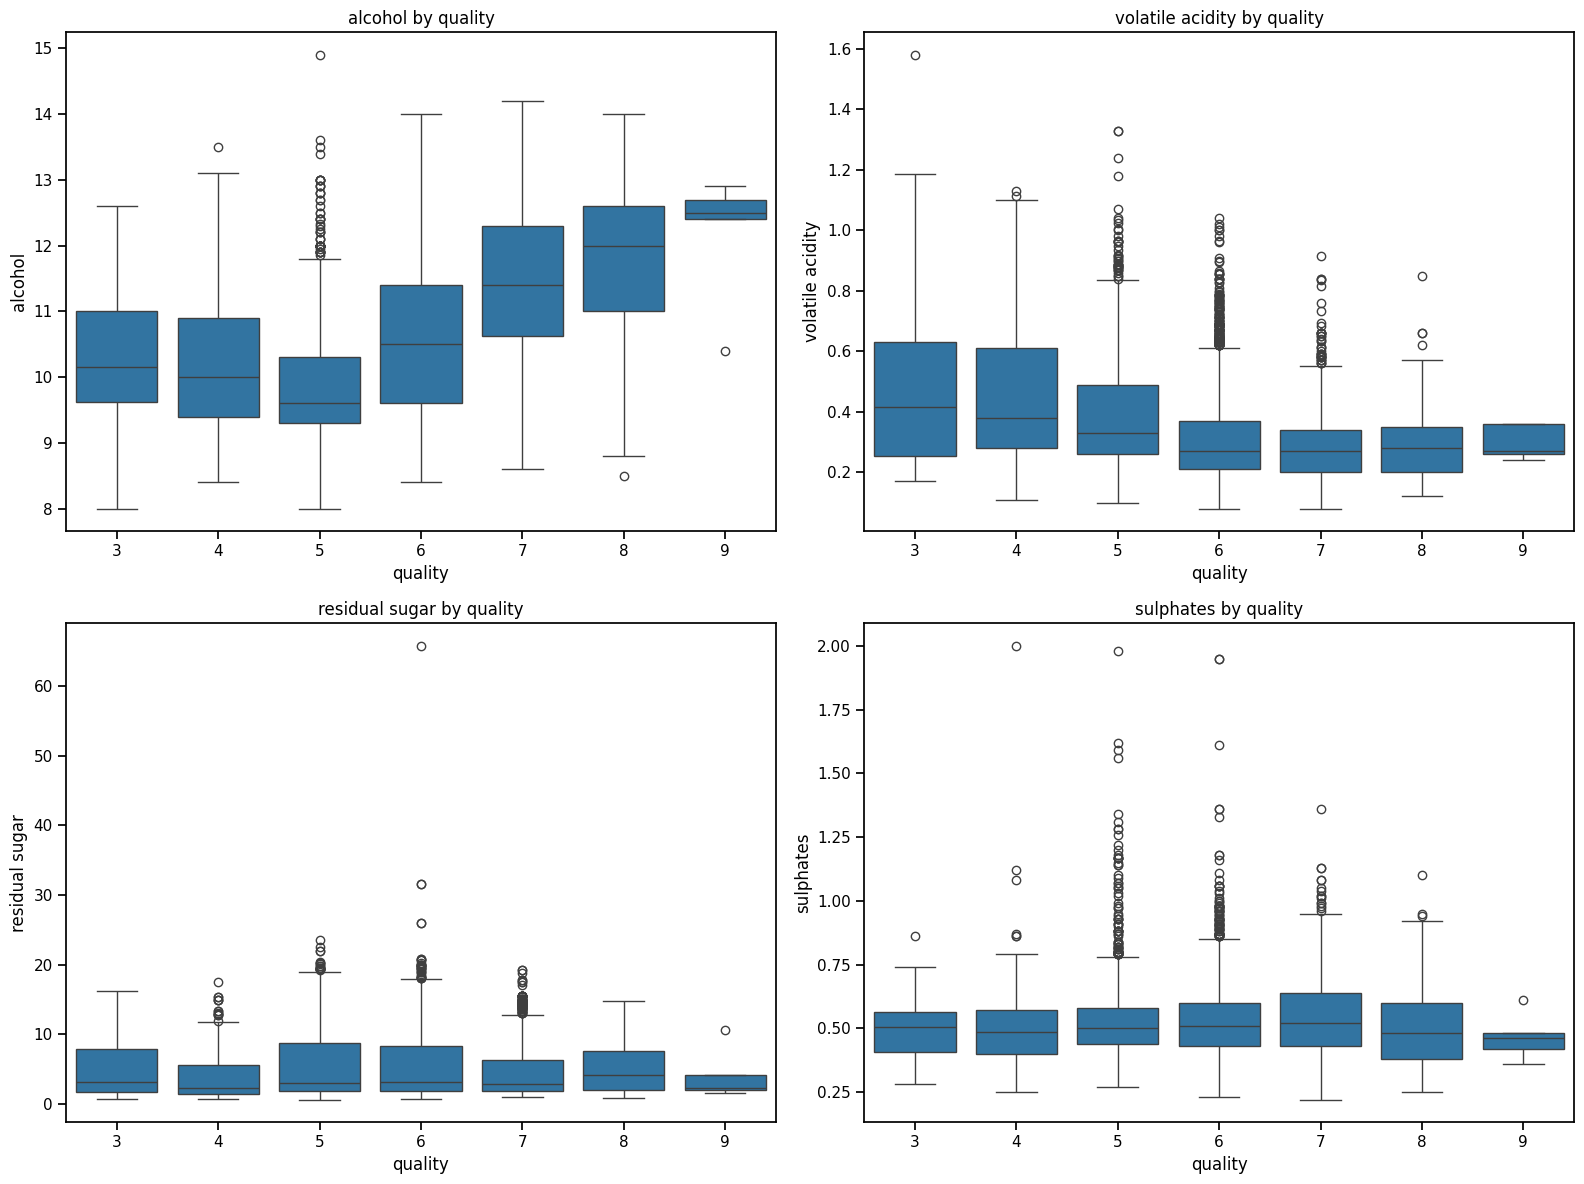

In [12]:
vars_to_plot = ['alcohol', 'volatile acidity', 'residual sugar', 'sulphates']
plt.figure(figsize=(16,12))
for i, v in enumerate(vars_to_plot,1):
    plt.subplot(2,2,i)
    sns.boxplot(x='quality', y=v, data=df)
    plt.title(f'{v} by quality')
plt.tight_layout()


### Comparación tinto vs blanco — variables clave

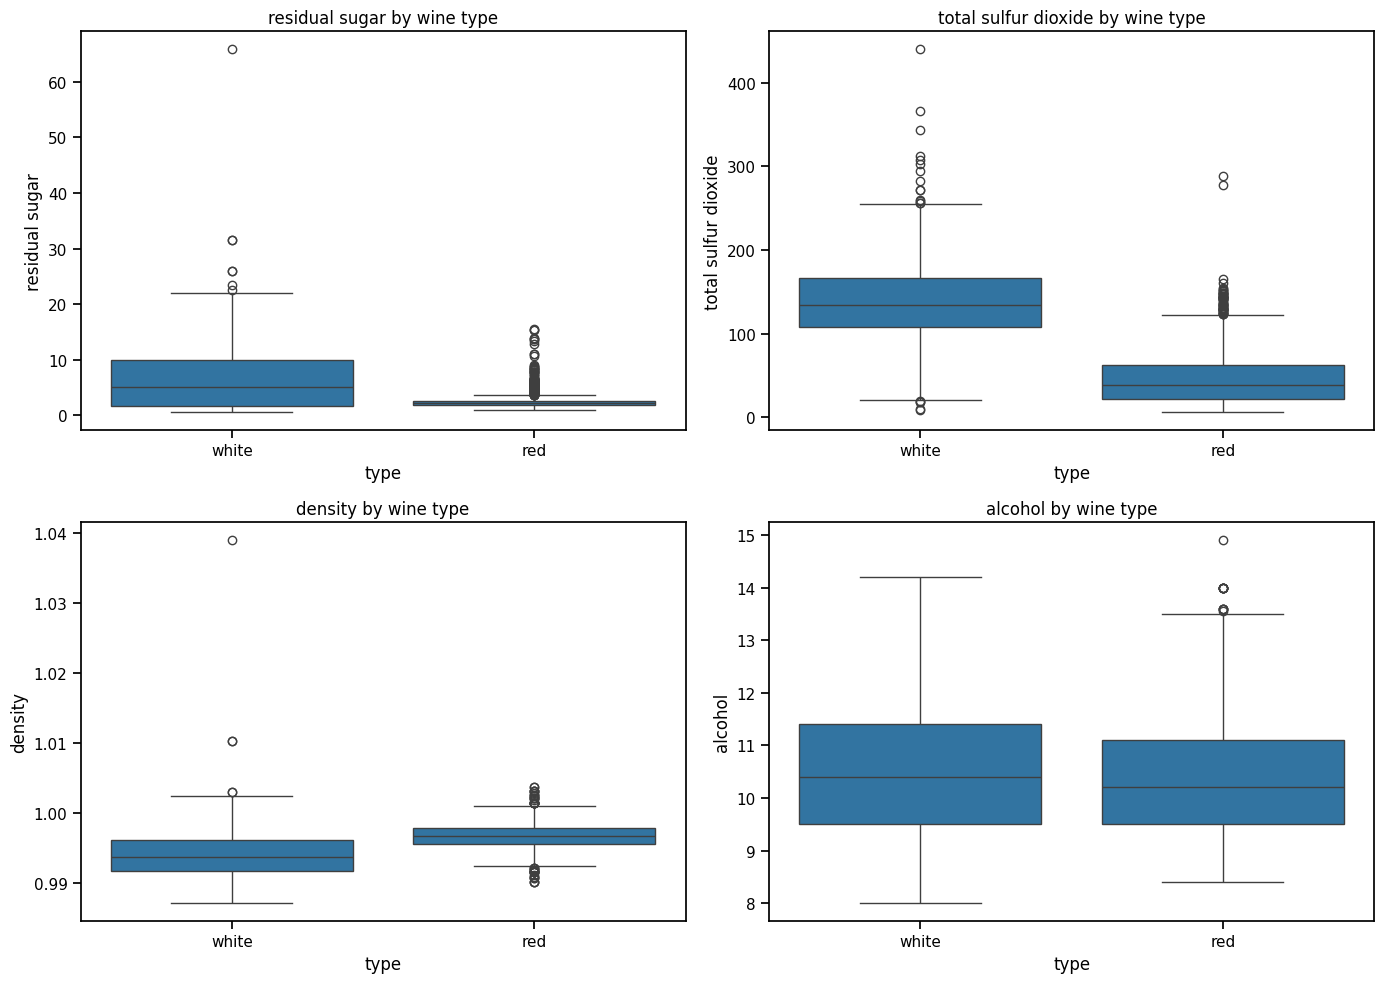

In [13]:
plt.figure(figsize=(14,10))
vars_cmp = ['residual sugar','total sulfur dioxide','density','alcohol']
for i,v in enumerate(vars_cmp,1):
    plt.subplot(2,2,i)
    sns.boxplot(x='type', y=v, data=df)
    plt.title(f'{v} by wine type')
plt.tight_layout()


## Feature engineering y preparación para ML

Sugerencias:

- Crear etiqueta binaria `quality_label` (e.g., low(<=5), medium(6), high(>=7)) para clasificación binaria/ternaria.
- Escalado de features si se usan modelos sensibles a escala.


In [14]:
# Crear etiqueta binaria y ternaria
# Binary: good (quality >=7) vs not good
# Ternary: low(<=5), medium(6), high(>=7)

df['quality_binary'] = (df['quality'] >= 7).astype(int)

def quality_ternary(q):
    if q <= 5:
        return 'low'
    elif q == 6:
        return 'medium'
    else:
        return 'high'

df['quality_ternary'] = df['quality'].apply(quality_ternary)

print('Distribución quality_binary:')
print(df['quality_binary'].value_counts())
print('\nDistribución quality_ternary:')
print(df['quality_ternary'].value_counts())

Distribución quality_binary:
quality_binary
0    5220
1    1277
Name: count, dtype: int64

Distribución quality_ternary:
quality_ternary
medium    2836
low       2384
high      1277
Name: count, dtype: int64


In [16]:
!pip install scikit-learn --quiet



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Modelado — Clasificación binaria (Random Forest)

Objetivo: predecir si un vino es 'good' (quality >=7) o no.

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features y target
features = df.select_dtypes(include='number').drop(columns=['quality']).columns.tolist()
X = df[features]
y = df['quality_binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Entrenar modelo
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Evaluar
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy (test):', round(acc,3))
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

# Importancia de features
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print('\nFeature importances:\n', importances)


Accuracy (test): 1.0

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00       319

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Feature importances:
 quality_binary          0.816539
alcohol                 0.061196
density                 0.029538
chlorides               0.020245
volatile acidity        0.013236
citric acid             0.010806
sulphates               0.009518
residual sugar          0.008850
pH                      0.008262
total sulfur dioxide    0.007827
free sulfur dioxide     0.007301
fixed acidity           0.006683
dtype: float64


### Guardar modelo y artefactos

Se sugiere guardar el modelo entrenado y el dataframe limpio en la carpeta del repo para referencia y reproducibilidad.

In [21]:
import joblib
import os

# Crear carpeta "models" en caso de que no exista
os.makedirs("models", exist_ok=True)

# Ruta final del modelo
model_path = "models/rf_wine_quality_model.pkl"

# Guardar el modelo
joblib.dump(rf, model_path)

print("Modelo guardado en:", model_path)


Modelo guardado en: models/rf_wine_quality_model.pkl


## Insights y recomendaciones

- **Alcohol**: Es la variable con mayor correlación positiva con la calidad. Se recomienda priorizar su control en el proceso productivo.
- **Acidez volátil**: En general impacta negativamente. Mantenerla bajo control ayuda a evitar defectos percibidos.
- **Sulphates**: Se observa influencia positiva moderada; revisar niveles óptimos.
- **Vinos blancos**: Mayor variabilidad en residual sugar y sulfur dioxide; revisar procesos de estabilización y conservación.

**Recomendaciones operativas**

1. Monitorizar alcohol y acidez volátil en controles de proceso.
2. Definir rangos objetivo para sulfatos y azufre total dependiendo del tipo de vino.
3. Repetir el análisis por lote / añada para validar consistencia.

